In [347]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, '../modules/')

from fintextmin import*

In [348]:
text_list = read_text_folder("./dataset/")
print("document number:", len(text_list))

document number: 11


In [349]:
def add_word(list):
    for items in list:
        jieba.add_word(items)
#建字典
add_word(['非洲豬瘟','高規格','野豬','養殖','至高'])

## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
stopwords = ['的', '是', '在', '有', '就','\ufeff', '即','從','而且', '但', '連', '什麼','很', '甚至','...'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [350]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

## [使用 fintextmin 寫法]
#doc_word_frequency = create_word_frequency_matrix(dwc)

[('誇張', 1),
 ('中國', 5),
 ('！', 2),
 ('官方', 1),
 ('宣傳', 1),
 ('非洲豬瘟', 7),
 ('豬肉', 6),
 ('可以', 3),
 ('放心', 2),
 ('吃', 1)]

In [351]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,記者,攜帶,品名,對豬,大,金,彭博,艱鉅性,中國受,如,...,即便,密度,連鄰國,Smith,公司,罰金,打動物,回升,葡萄牙,客戶
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [352]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
#df_tfidf = evaluate_tfidf(wfm)

,記者,攜帶,品名,對豬,大,金,彭博,艱鉅性,中國受,如,...,即便,密度,連鄰國,Smith,公司,罰金,打動物,回升,葡萄牙,客戶
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.149930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043851,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.032481,0.032481,0.000000,0.000000,0.000000,0.000000,0.129925,...,0.032481,0.000000,0.000000,0.000000,0.000000,0.032481,0.000000,0.000000,0.032481,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056917,0.056917,0.056917,0.000000,...,0.000000,0.000000,0.000000,0.056917,0.056917,0.000000,0.000000,0.056917,0.000000,0.056917
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.046697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.104929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.057319,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.045031,0.052683,0.000000,0.000000,0.052683,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [353]:
wfm
N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [354]:
logdf

[0.7403626894942439,
 0.7403626894942439,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 0.7403626894942439,
 1.0413926851582251,
 1.0413926851582251,
 0.0,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 0.5642714304385625,
 1.0413926851582251,
 0.43933269383026263,
 0.5642714304385625,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 1.0413926851582251,
 0.5642714304385625,
 1.0413926851582251,
 0.5642714304385625,
 1.0413926851582251,
 0.5642714304385625,
 1.0413926851582251,
 1.0413926851582251,
 1.041

In [355]:
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

In [356]:
wfm['非洲豬瘟']

0      7.0
1      2.0
2     11.0
3     16.0
4      6.0
5      6.0
6     10.0
7      2.0
8      6.0
9      7.0
10     5.0
Name: 非洲豬瘟, dtype: float64

In [357]:
df_tfidf['中國']

0     0.691513
1     0.000000
2     0.000000
3     1.106422
4     1.244724
5     0.968119
6     0.553211
7     0.414908
8     0.414908
9     0.000000
10    0.141177
Name: 中國, dtype: float64

In [358]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('記者', 0.0),
 ('攜帶', 0.0),
 ('品名', 0.0),
 ('對豬', 0.0),
 ('大', 0.0),
 ('金', 0.0),
 ('彭博', 0.0),
 ('艱鉅性', 0.0),
 ('中國受', 0.0),
 ('如', 0.0)]

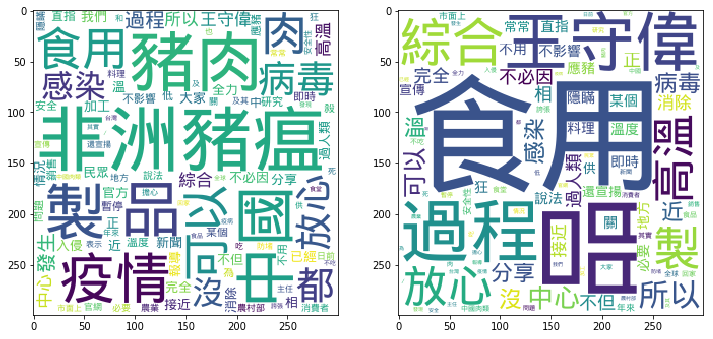

In [359]:
linux_font = r'\Users\User\Downloads\wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

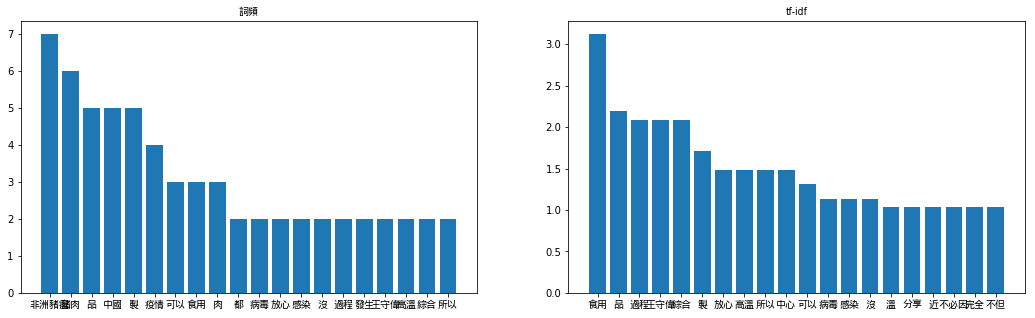

In [360]:
plt.figure(figsize=(18, 5))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")